In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit

In [42]:
def func(t, u, gamma, beta):
    
    S, I, R = u
    
    dS = -beta*S*I
    dI = beta*S*I - gamma*I   
    dR = gamma*I
    
    return np.array([dS, dI, dR])

N = 763 # total number of students
days = np.arange(1, 15) # duration of outbreak
cases = np.array([3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5]) / N # cases (ratio)

S0 = 762/763
I0 = 1.0/763
R0 = 0.0

u0 = np.array([S0, I0, R0])
tspan = (1, 14)

def integrand(t, gamma, beta):
    sol = solve_ivp(func, tspan, u0, args=(gamma, beta), dense_output=True)
    return sol.sol(t)[1] # only return I(t)

fit = curve_fit(integrand, days, cases)[0]

KeyboardInterrupt: 

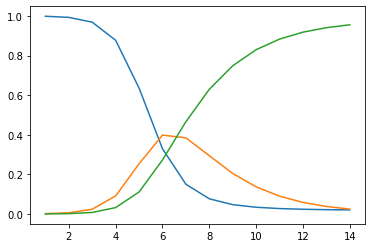

In [40]:
plt.plot(days, integrand(days, fit[0], fit[1]))

ValueError: x and y must have same first dimension, but have shapes (14,) and (1,)

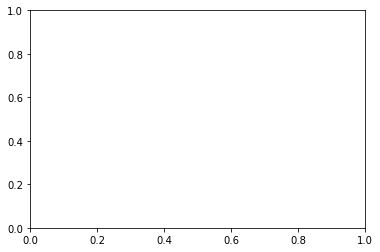

In [15]:
plt.plot(days, integrand(days, 0.48, 1.95))

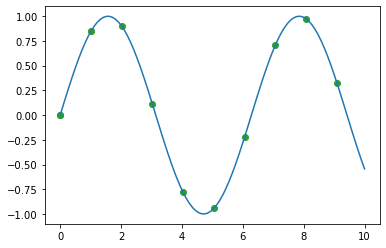

In [5]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.scatter(x[0], y[0])
plt.scatter(x[10], y[10])
plt.scatter(x[0::10], y[0::10])

In [6]:
for i in np.linspace(0, 1.0, 100):
    print(i)

0.0
0.010101010101010102
0.020202020202020204
0.030303030303030304
0.04040404040404041
0.05050505050505051
0.06060606060606061
0.07070707070707072
0.08080808080808081
0.09090909090909091
0.10101010101010102
0.11111111111111112
0.12121212121212122
0.13131313131313133
0.14141414141414144
0.15151515151515152
0.16161616161616163
0.17171717171717174
0.18181818181818182
0.19191919191919193
0.20202020202020204
0.21212121212121213
0.22222222222222224
0.23232323232323235
0.24242424242424243
0.25252525252525254
0.26262626262626265
0.27272727272727276
0.2828282828282829
0.29292929292929293
0.30303030303030304
0.31313131313131315
0.32323232323232326
0.33333333333333337
0.3434343434343435
0.3535353535353536
0.36363636363636365
0.37373737373737376
0.38383838383838387
0.393939393939394
0.4040404040404041
0.4141414141414142
0.42424242424242425
0.43434343434343436
0.4444444444444445
0.4545454545454546
0.4646464646464647
0.4747474747474748
0.48484848484848486
0.494949494949495
0.5050505050505051
0.51515